# 04 Homework
© Copyright: 2024, Selma Hadzic, all rights reserved.

#### Number of points: 15 (weights 15% in the final grade)


1. Pull from the `ESMT_2024_DataScraping_Lectures` repository: you should get this `04_Homework` file
2. Launch VS Code and open your working-folder
3. Create a `Session_04` folder, in which you create another folder called `data`
4. Copy paste the notebook `04_Homework` from the lectures repo to the working-folder. Copy the csv file `WHO_COVID19_cases.csv` into the `working-folder/Session_04/data` directory.
5. Do the exercises on 04_Homework in your working-folder
6. Once you are finished, copy-Paste the notebook into `ESMT_2024_DataScraping_Students` folder in your computer
8. Commit and push your homework in your branch before the deadline

#### Deadline: October 24th 01:29 pm CET

#### Any missed deadline without justification to the Administration will result in 0 points for this homework.
#### If the Github branch is not correctly named using the indicated format **LASTNAME_firstname**, then a penalty of -2 points will be applied

## Dataset: use the WHO_COVID19_cases.csv dataset from Session_01

## 1- Filter the data for 3 countries and draw a line plot for Cumulative_cases vs Date_reported using seaborn (7.5 points)

*Tip: you may want to explore `plt.xticks(rotation=90);` and `plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(6)) ;` to unclutter the dates on the x-axis*

In [3]:
import seaborn as sns
import pandas as pd

In [4]:
df = pd.read_csv('./data/WHO_COVID19_cases.csv')

In [5]:
df.head(10)

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
5,2020-02-09,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
6,2020-02-16,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
7,2020-02-23,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
8,2020-03-01,AF,Afghanistan,Asia,EMRO,1.0,1,NaN,0
9,2020-03-08,AF,Afghanistan,Asia,EMRO,NaN,1,NaN,0


C:\Users\ReBear\AppData\Local\Temp\ipykernel_13404\4000730311.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Date_reported'] = pd.to_datetime(filtered_data['Date_reported'])


<Axes: xlabel='Date_reported', ylabel='Cumulative_cases'>

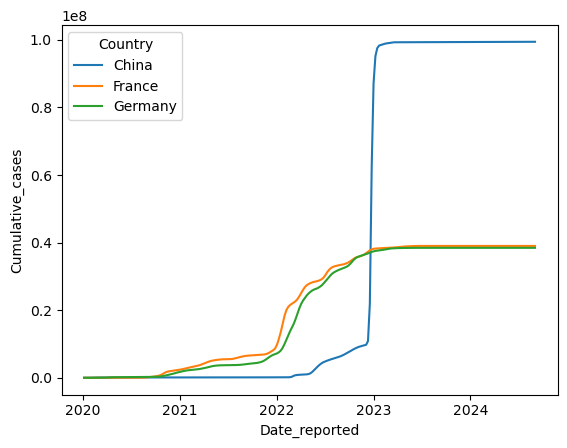

In [14]:
data = df.copy(deep=True)
Countries_pick = ['China', 'Germany', 'France']
filtered_data = data[data['Country'].isin(Countries_pick)]
filtered_data['Date_reported'] = pd.to_datetime(filtered_data['Date_reported'])
sns.lineplot(data=filtered_data, x='Date_reported', y='Cumulative_cases', hue='Country')

## 2- Make a line plot showing the cumulative_deaths vs cumulative_cases for 3 countries using `plotly` (7.5 points)

In [16]:
import plotly.express as px

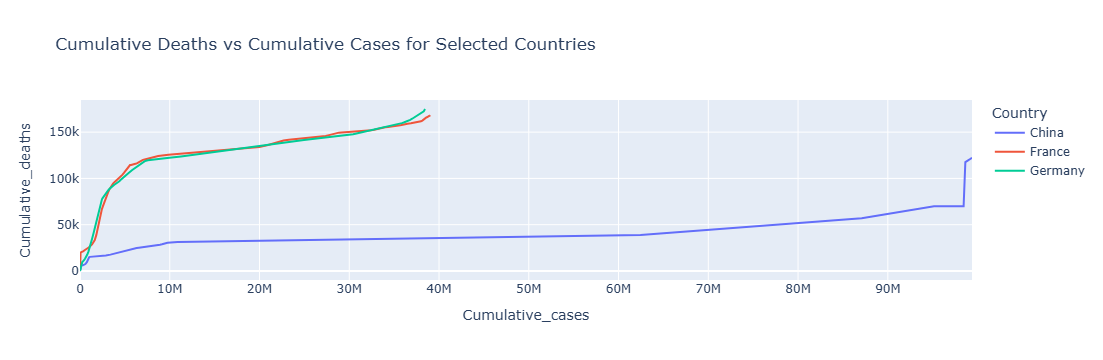

In [19]:
fig = px.line(
    filtered_data, 
    x='Cumulative_cases', 
    y='Cumulative_deaths', 
    color='Country',
    title='Cumulative Deaths vs Cumulative Cases for Selected Countries'
)
fig.show()